In [104]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
#load the dataset
df = pd.read_csv('test_energy_data.csv')

#display the first 5
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [106]:
#check for missing values
df.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


In [107]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


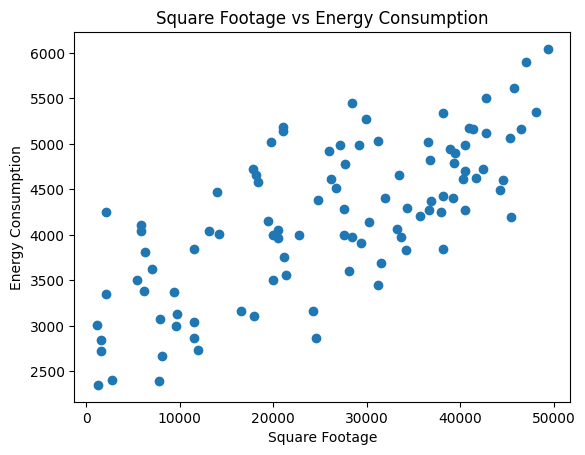

In [108]:
#scatter plot
plt.scatter(df['Square Footage'], df['Energy Consumption'])
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')
plt.title('Square Footage vs Energy Consumption')
plt.show()

In [109]:
#features (independent var) and target var (dependent var)
#independent var (temp)
X = df[['Square Footage']]
y = df['Energy Consumption']


In [110]:
#Split the data into training and testing sets
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [111]:
X_train.head()

,Square Footage
55,36496
88,21087
26,40486
42,39390
69,38099


In [112]:
#create a linear regression model
model= LinearRegression()
#train the model
model.fit(X_train,y_train)

LinearRegression()

In [113]:
#find the coefficient and the intercept
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [0.04321312]
Intercept: 3064.73290065129


In [114]:
print(model.coef_*20+ model.intercept_)
y_pred= model.predict(X_test)
y_pred

[3065.59716299]


array([5097.56434716, 3407.15363919, 3320.03599546, 3299.98510921,
       4648.14793112, 5042.68368867, 4911.18617385, 4294.62142153,
       4853.79915457, 4126.17669175, 3330.70963534, 4262.08194448,
       4219.17131937, 3925.79746855, 4412.03146022, 4651.51855424,
       4195.10161325, 4743.82177199, 4445.95375701, 4989.40191549])

In [115]:
#calculate mean square error
mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#r square
r2= r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 277355.90554680536
R-squared: 0.5841560565562616


Text(0, 0.5, 'Energy Consumption')

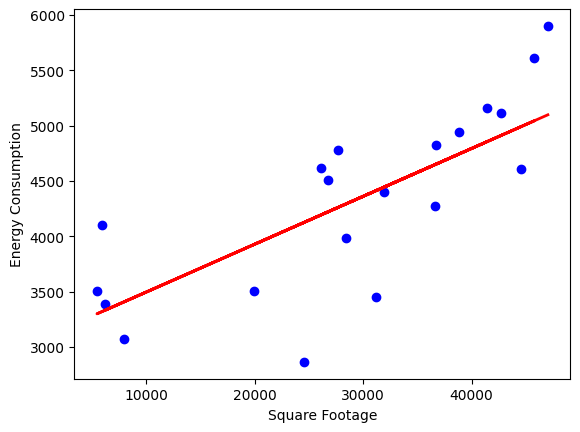

In [116]:
#plot the test data and regression line
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_test,y_pred, color='red', linewidth=2)
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')

In [117]:
import joblib
#save the model to file
joblib.dump(model, 'smart_building_energy_model.pkl')

['smart_building_energy_model.pkl']

In [118]:
# Create a DataFrame with the new temperature values for prediction
new_data = pd.DataFrame({'Square Footage': [25]})

# Make predictions using the loaded model
predictions = model.predict(new_data)

# Print the predictions
print(f"energy consumption predictions are: {predictions}")

energy consumption predictions are: [3065.81322857]
